# librerias y carga de archivos

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

def leer_datos(text):
    file_1 = pd.read_csv(text, sep='\t',header = 0)
    matrix = np.array(file_1)
    return matrix


# normalización

In [2]:
def normalizar_datos(matrix):
    promedio = np.sum(matrix, axis = 0)/matrix.shape[0]
    minimos = matrix.min(axis = 0)
    maximos = matrix.max(axis = 0)
    matrix = (matrix - promedio)/(maximos - minimos)
    return matrix


# conjuntos entrenamiento prueba

In [11]:
def crear_entrenamiento_prueba(matrix,nombre):
    sep = int(matrix.shape[0]*0.7)
    entrenamiento = matrix[:sep]
    prueba = matrix[sep:]
#     _entrenamiento = pd.DataFrame(data=entrenamiento.flatten())
#     _prueba = pd.DataFrame(data=prueba.flatten())
#     _entrenamiento.to_csv(nombre + '_entrenamiento.csv')
#     _prueba.to_csv(nombre + '_prueba.csv')
    return entrenamiento, prueba

# creacion de subconjuntos

In [4]:
def crear_subconjuntos(entrenamiento):
    sep = entrenamiento.shape[1]-1
    x_array = entrenamiento[:, 0:sep]
    y_array = entrenamiento[:, sep:]
    x_array  = np.concatenate((np.ones((len(x_array), 1)), x_array), axis=1)
    return x_array, y_array


# Gradiente Descendente

In [5]:
def hipotesis(theta_array, x_array):
    return np.dot(x_array, theta_array)

def nuevo_theta_0(theta_0, alpha, h_array, y_array):
    return theta_0 - ( ( alpha /  h_array.shape[0] ) * np.sum( h_array - y_array ) )

def nuevo_theta_1(theta_1, alpha, h_array, y_array, x_array):
    return theta_1 - ( ( alpha /  h_array.shape[0] ) * np.sum( (h_array - y_array) * x_array ))


def calc_nuevos_thetas(theta_array, alpha, h_array, y_array, x_array):
    theta_array[0,0] = theta_array[0,0] - ( ( alpha /  h_array.shape[0] ) * np.sum( h_array - y_array ) )
    for i in range (1, theta_array.shape[0]):
        theta_array[i,0] = theta_array[i,0] - ( ( alpha /  h_array.shape[0] ) * np.sum( ( h_array - y_array )* x_array[:,i:i+1] ) )
    return theta_array

def calcular_costo(h_array, y_array):
    return (1 / (2*h_array.shape[0])) * np.sum( (h_array - y_array) ** 2 )


In [6]:
def gradiente_descendiente(x_array, y_array, theta_array, num_iteracion, tasa_aprendizaje):
    
    inicio_costos = np.zeros(num_iteracion)
    for i in range(num_iteracion):
        h_array = hipotesis(theta_array, x_array)
        theta_array = calc_nuevos_thetas(theta_array, tasa_aprendizaje, h_array, y_array,x_array)
        #theta_array[0,0] = nuevo_theta_0(theta_array[0,0], tasa_aprendizaje, h_array, y_array)
        #theta_array[1,0] = nuevo_theta_1(theta_array[1,0], tasa_aprendizaje, h_array, y_array, x_array)
        inicio_costos[i] = calcular_costo(h_array, y_array)
    return theta_array, inicio_costos

# Ecuacion Normal
 

In [7]:
#teta_array = np.dot(np.linalg.inv(np.dot(x_array.T,x_array)),np.dot(x_array.T,y_array) )

def ecuacion_normal(x_array, y_array):
    theta_array = np.dot(np.dot(np.linalg.inv(np.dot(x_array.T,x_array)),x_array.T),y_array)
    h_array = np.dot(x_array, theta_array)
    j = (1/(2*x_array.shape[0]))* np.sum((h_array-y_array)**2)
    return theta_array,j


# main

In [12]:
#lectura
matrix_oceano_simple = leer_datos('oceano_simple.csv')
matrix_petrol_consumption = leer_datos('petrol_consumption.csv')
matrix_precio_casas = leer_datos('ex1data2.csv')

#normalizacion
normalizada_oceano_simple = normalizar_datos(matrix_oceano_simple)
normalizada_petrol_consumption = normalizar_datos(matrix_petrol_consumption)
normalizada_precio_casas = normalizar_datos(matrix_precio_casas)


#entrenamiento / prueba
oceano_simple_entrenamiento, oceano_simple_prueba = crear_entrenamiento_prueba(normalizada_oceano_simple,'oceano_simple')
petrol_consumption_entrenamiento, petrol_consumption_prueba = crear_entrenamiento_prueba(normalizada_petrol_consumption,'consumo_petroleo') 
precio_casas_entrenamiento, precio_casas_prueba  = crear_entrenamiento_prueba(normalizada_precio_casas,'precio_casas')

#creacion de x e y
x_array_oceano_simple, y_array_oceano_simple = crear_subconjuntos(oceano_simple_entrenamiento)
x_array_precio_casas, y_array_precio_casas = crear_subconjuntos(precio_casas_entrenamiento)
x_array_petrol_consumption, y_array_petrol_consumption = crear_subconjuntos(petrol_consumption_entrenamiento)

x_array_oceano_simple_prueba, y_array_oceano_simple_prueba = crear_subconjuntos(oceano_simple_prueba)
x_array_precio_casas_prueba, y_array_precio_casas_prueba = crear_subconjuntos(precio_casas_prueba)
x_array_petrol_consumption_prueba, y_array_petrol_consumption_prueba = crear_subconjuntos(petrol_consumption_prueba)


#normal
theta_array_normal_oceano_simple, j_normal_oceano_simple = ecuacion_normal(x_array_oceano_simple, y_array_oceano_simple)
theta_array_normal_precio_casas, j_normal_precio_casas = ecuacion_normal(x_array_precio_casas, y_array_precio_casas)
theta_array_normal_petrol_consumption, j_normal_petrol_consumption = ecuacion_normal(x_array_petrol_consumption, y_array_petrol_consumption)


theta_array_normal_oceano_simple_prueba, j_normal_oceano_simple_prueba = ecuacion_normal(x_array_oceano_simple_prueba, y_array_oceano_simple_prueba)
theta_array_normal_precio_casas_prueba, j_normal_precio_casas_prueba = ecuacion_normal(x_array_precio_casas_prueba, y_array_precio_casas_prueba)
theta_array_normal_petrol_consumption_prueba, j_normal_petrol_consumption_prueba = ecuacion_normal(x_array_petrol_consumption_prueba, y_array_petrol_consumption_prueba)


print("entrenamiento")
print("oceano_simple")
#print(theta_array_normal_oceano_simple)
print(j_normal_oceano_simple)
print("precio_casas")
#print(theta_array_normal_precio_casas)
print(j_normal_precio_casas)
print("petrol_consunmption")
#print(theta_array_normal_petrol_consumption)
print(j_normal_petrol_consumption)

print("prueba")
print("oceano_simple")
#print(theta_array_normal_oceano_simple_prueba)
print(j_normal_oceano_simple_prueba)
print("precio_casas")
#print(theta_array_normal_precio_casas_prueba)
print(j_normal_precio_casas_prueba)
print("petrol_consunmption")
#print(theta_array_normal_petrol_consumption_prueba)
print(j_normal_petrol_consumption_prueba)


#gradiente descendente
theta_array_oceano_simple = np.zeros((matrix_oceano_simple.shape[1],1))
theta_array_precio_casas = np.zeros((matrix_precio_casas.shape[1],1))
theta_array_petrol_consumption = np.zeros((matrix_petrol_consumption.shape[1],1))

theta_array_oceano_simple, costos_oceano_simple = gradiente_descendiente(x_array_oceano_simple, y_array_oceano_simple, theta_array_oceano_simple, 1000, 0.3) 
theta_array_precio_casas, costos_precio_casas = gradiente_descendiente(x_array_precio_casas, y_array_precio_casas, theta_array_precio_casas, 1500, 0.3) 
theta_array_petrol_consumption, costos_petrol_consumption = gradiente_descendiente(x_array_petrol_consumption, y_array_petrol_consumption, theta_array_petrol_consumption, 2500, 0.3) 

#gradiente descendente prueba
theta_array_oceano_simple_prueba = np.zeros((matrix_oceano_simple.shape[1],1))
theta_array_precio_casas_prueba = np.zeros((matrix_precio_casas.shape[1],1))
theta_array_petrol_consumption_prueba = np.zeros((matrix_petrol_consumption.shape[1],1))

theta_array_oceano_simple_prueba, costos_oceano_simple_prueba = gradiente_descendiente(x_array_oceano_simple_prueba, y_array_oceano_simple_prueba, theta_array_oceano_simple_prueba, 1000, 0.3) 
theta_array_precio_casas_prueba, costos_precio_casas_prueba = gradiente_descendiente(x_array_precio_casas_prueba, y_array_precio_casas_prueba, theta_array_precio_casas_prueba, 1500, 0.3) 
theta_array_petrol_consumption_prueba, costos_petrol_consumption_prueba = gradiente_descendiente(x_array_petrol_consumption_prueba, y_array_petrol_consumption_prueba, theta_array_petrol_consumption_prueba, 2500, 0.3) 



#petrol consumption

# print("petrol consumption normal thetas")
# print(theta_array_normal_petrol_consumption)
# print("petrol consumption gradiente thetas")
# print(theta_array_petrol_consumption)
# print("\n petrol consumption normal error")
# print(j_normal_petrol_consumption)
# print("petrol consumption gradiente error")
# print(costos_petrol_consumption)

#plot(costos_oceano_simple)
#plot(costos_precio_casas)
#plot(costos_petrol_consumption)

#oceano simple

# plot(x_array_oceano_simple[:,1:],y_array_oceano_simple,'ro')
# x = np.arange(-0.6, 0.7,0.01)
# y = theta_array_normal_oceano_simple[0,0] +theta_array_normal_oceano_simple[1,0]*x 
# x_1 = np.arange(-0.6, 0.7,0.01)
# y_1 = theta_array_oceano_simple[0,0] + theta_array_oceano_simple[1,0] *x_1
# plot(x, y)
# plot(x_1,y_1)
# show()

#precio_casas

# plot(x_array_precio_casas[:,1:],y_array_precio_casas,'ro')
# x = np.arange(-0.6, 0.7,0.01)
# y = theta_array_normal_precio_casas[0,0] +theta_array_normal_precio_casas[1,0]*x 
# x_1 = np.arange(-0.6, 0.7,0.01)
# y_1 = theta_array_precio_casas[0,0] + theta_array_precio_casas[1,0] * x_1

# plot(x, y)
# plot(x_1,y_1)
# show()



# plot(x_array_petrol_consumption[:,1:],y_array_petrol_consumption,'ro')
# x = np.arange(-0.6, 0.7,0.01)
# y = theta_array_normal_petrol_consumption[0,0] +theta_array_normal_petrol_consumption[1,0]*x 
# x_1 = np.arange(-0.6, 0.7,0.01)
# x_2 = np.arange(-0.6, 0.7,0.01)
# x_3 = np.arange(-0.6, 0.7,0.01)
# x_4 = np.arange(-0.6, 0.7,0.01)
# x_5 = np.arange(-0.6, 0.7,0.01)

# y_1 = theta_array_petrol_consumption[0,0] + theta_array_petrol_consumption[1,0] * x_1 + theta_array_petrol_consumption[2,0] * x_2 + theta_array_petrol_consumption[3,0] * x_3 + theta_array_petrol_consumption[4,0] *x_4

# plot(x, y)
# plot(x_1,y_1)
# show()


#     plot(costos_precio_casas)
#     plt.xlabel("iteraciones")  
#     plt.ylabel("error")
#     plt.title("Grafica de costo error para precios de casas")
#     plt.show()
#     plot(costos_oceano_simple)
#     show()
#     plot(costos_petrol_consumption)
#     show()

entrenamiento
oceano_simple
0.007427557141851543
precio_casas
0.007973666550980741
petrol_consunmption
0.0033233088533398064
prueba
oceano_simple
0.0048065705458373775
precio_casas
0.00448196062465984
petrol_consunmption
0.006617212535341245


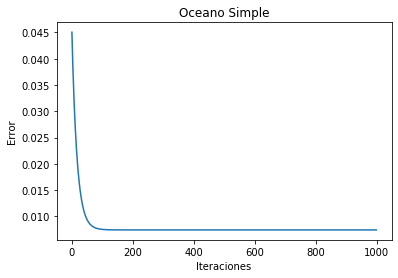

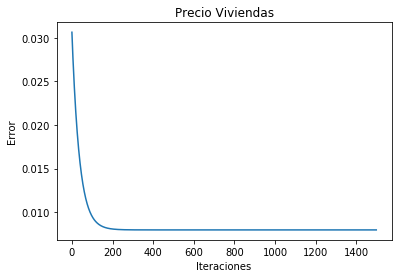

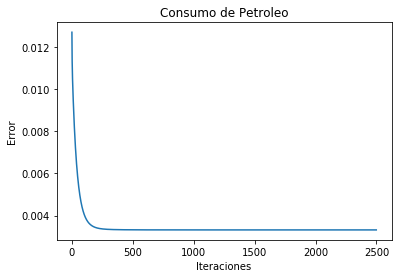

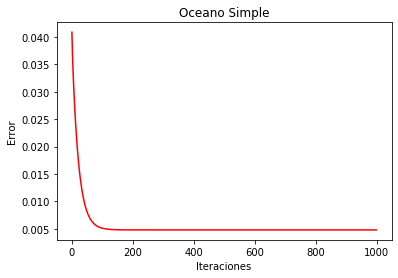

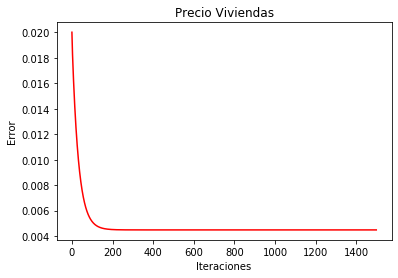

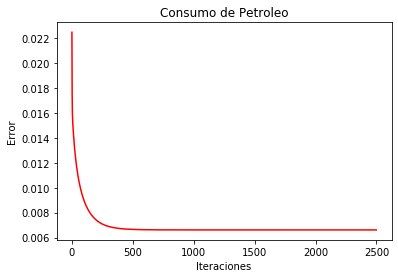

In [35]:
def ejercicio1(x_array_oceano_simple, y_array_oceano_simple, x_array_precio_casas, y_array_precio_casas, x_array_petrol_consumption, y_array_petrol_consumption ):
    theta_array_normal_oceano_simple, j_normal_oceano_simple = ecuacion_normal(x_array_oceano_simple, y_array_oceano_simple)
    theta_array_normal_precio_casas, j_normal_precio_casas = ecuacion_normal(x_array_precio_casas, y_array_precio_casas)
    theta_array_normal_petrol_consumption, j_normal_petrol_consumption = ecuacion_normal(x_array_petrol_consumption, y_array_petrol_consumption)


    theta_array_normal_oceano_simple_prueba, j_normal_oceano_simple_prueba = ecuacion_normal(x_array_oceano_simple_prueba, y_array_oceano_simple_prueba)
    theta_array_normal_precio_casas_prueba, j_normal_precio_casas_prueba = ecuacion_normal(x_array_precio_casas_prueba, y_array_precio_casas_prueba)
    theta_array_normal_petrol_consumption_prueba, j_normal_petrol_consumption_prueba = ecuacion_normal(x_array_petrol_consumption_prueba, y_array_petrol_consumption_prueba)


    print("entrenamiento")
    print("oceano_simple")
    #print(theta_array_normal_oceano_simple)
    print(j_normal_oceano_simple)
    print("precio_casas")
    #print(theta_array_normal_precio_casas)
    print(j_normal_precio_casas)
    print("petrol_consunmption")
    #print(theta_array_normal_petrol_consumption)
    print(j_normal_petrol_consumption)

    print("prueba")
    print("oceano_simple")
    #print(theta_array_normal_oceano_simple_prueba)
    print(j_normal_oceano_simple_prueba)
    print("precio_casas")
    #print(theta_array_normal_precio_casas_prueba)
    print(j_normal_precio_casas_prueba)
    print("petrol_consunmption")
    #print(theta_array_normal_petrol_consumption_prueba)
    print(j_normal_petrol_consumption_prueba)
    return
    
    
def ejercicio2(x_array_oceano_simple, y_array_oceano_simple, matrix_oceano_simple, 
               x_array_precio_casas, y_array_precio_casas, matrix_precio_casas, 
               x_array_petrol_consumption, y_array_petrol_consumption, matrix_petrol_consumption):

    for tasa in [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]:
        for ite in range(500,4000,500):
            print("tasa: ", tasa, " iteracion: ", ite)
            theta_array_oceano_simple = np.zeros((matrix_oceano_simple.shape[1],1))
            theta_array_precio_casas = np.zeros((matrix_precio_casas.shape[1],1))
            theta_array_petrol_consumption = np.zeros((matrix_petrol_consumption.shape[1],1))
            
            theta_array_oceano_simple, costos_oceano_simple = gradiente_descendiente(x_array_oceano_simple, y_array_oceano_simple, theta_array_oceano_simple, ite, tasa) 
            theta_array_precio_casas, costos_precio_casas = gradiente_descendiente(x_array_precio_casas, y_array_precio_casas, theta_array_precio_casas, ite, tasa) 
            theta_array_petrol_consumption, costos_petrol_consumption = gradiente_descendiente(x_array_petrol_consumption, y_array_petrol_consumption, theta_array_petrol_consumption, ite, tasa) 
            
#             print("oceano simple")
#             print("theta_array")
#             #print(theta_array_oceano_simple)
#             print(costos_oceano_simple[-1]) #utimo elemento de costo
            
#             print("precio_casas")
#             # print(theta_array_precio_casas)
#             print(costos_precio_casas[-1])
            
            print("petrol_consumption")
            #print(theta_array_petrol_consumption)
            print(costos_petrol_consumption[-1])
            
    return

def ejercicio3(x_array_precio_casas, y_array_precio_casas, theta_array_normal_precio_casas, theta_array_precio_casas ):

    x = np.arange(-0.6, 0.7,0.01)
    y = theta_array_normal_precio_casas[0,0] +theta_array_normal_precio_casas[1,0]*x 
    x_1 = np.arange(-0.6, 0.7,0.01)
    y_1 = theta_array_precio_casas[0,0] + theta_array_precio_casas[1,0] * x_1
    
    plot(x_array_precio_casas[:,1:],y_array_precio_casas,'ro')
    plot(x, y,'b',label='normal')
    plot(x_1,y_1,'y', label='gradiente')
    
    plt.xlabel("Tamaño Vivienda")  
    plt.ylabel("Precio")
    plt.title("Precio Viviendas")
    plt.legend()
    
    show()
    return

def ejercicio4(costos_oceano_simple, costos_precio_casas, costos_petrol_consumption,costos_oceano_simple_prueba, costos_precio_casas_prueba, costos_petrol_consumption_prueba):
    #entrenamiento
    plot(costos_oceano_simple)
    plt.xlabel("Iteraciones")  
    plt.ylabel("Error")
    plt.title("Oceano Simple")
    show()
    plot(costos_precio_casas)
    plt.xlabel("Iteraciones")  
    plt.ylabel("Error")
    plt.title("Precio Viviendas")
    show()
    plot(costos_petrol_consumption)
    plt.xlabel("Iteraciones")  
    plt.ylabel("Error")
    plt.title("Consumo de Petroleo")
    show()
    
    #prueba
    plot(costos_oceano_simple_prueba,'r')
    plt.xlabel("Iteraciones")  
    plt.ylabel("Error")
    plt.title("Oceano Simple")
    show()
    plot(costos_precio_casas_prueba,'r')
    plt.xlabel("Iteraciones")  
    plt.ylabel("Error")
    plt.title("Precio Viviendas")
    show()
    plot(costos_petrol_consumption_prueba,'r')
    plt.xlabel("Iteraciones")  
    plt.ylabel("Error")
    plt.title("Consumo de Petroleo")
    show()
    
    return


#ejercicio1(x_array_oceano_simple, y_array_oceano_simple, x_array_precio_casas, y_array_precio_casas, x_array_petrol_consumption, y_array_petrol_consumption )
#ejercicio2(x_array_oceano_simple, y_array_oceano_simple, matrix_oceano_simple, x_array_precio_casas, y_array_precio_casas, matrix_precio_casas, x_array_petrol_consumption, y_array_petrol_consumption, matrix_petrol_consumption)
#ejercicio3(x_array_precio_casas, y_array_precio_casas, theta_array_normal_precio_casas, theta_array_precio_casas )
ejercicio4(costos_oceano_simple, costos_precio_casas, costos_petrol_consumption,costos_oceano_simple_prueba, costos_precio_casas_prueba, costos_petrol_consumption_prueba)